https://www.kaggle.com/datasets/apollo2506/facial-recognition-dataset

Author: Gotam Dahiya

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing import image
import os
import cv2 as cv
import random

Importing Dataset

Preprocess Train Dataset

In [49]:
#get the dataaset
train_data = ImageDataGenerator(rescale = 1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip = True)
train_dataset = train_data.flow_from_directory('facial/Training\Training',target_size=(128,128),batch_size=32,class_mode = 'categorical')

Found 28273 images belonging to 6 classes.


In [50]:
train_dataset.class_indices

{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4, 'Suprise': 5}

In [51]:
for image_batch,label_batch in train_dataset:
    print('Image Shape: ',image_batch.shape)
    print('Label Shape: ',label_batch.shape)
    break

Image Shape:  (32, 128, 128, 3)
Label Shape:  (32, 6)


Preprocess Test Dataset

In [52]:
test_data = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip = True)
test_dataset = test_data.flow_from_directory('facial/Testing/Testing/',target_size=(180,180),batch_size=32,class_mode='categorical')

Found 7067 images belonging to 6 classes.


In [53]:
test_dataset.class_indices

{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4, 'Suprise': 5}

In [54]:
for image_batch,label_batch in test_dataset:
    print('Image Shape: ',image_batch.shape)
    print('Label Shape: ',label_batch.shape)
    break

Image Shape:  (32, 180, 180, 3)
Label Shape:  (32, 6)


Create a Validation Dataset

In [55]:
validation_data = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip = True,validation_split=0.9)
validation_dataset = validation_data.flow_from_directory('facial/Training\Training',target_size=(128,128),batch_size=32,class_mode='categorical',subset="validation")

Found 25443 images belonging to 6 classes.


In [56]:
for image_batch,label_batch in validation_dataset:
    print('Image Shape: ',image_batch.shape)
    print('Label Shape: ',label_batch.shape)
    break

Image Shape:  (32, 128, 128, 3)
Label Shape:  (32, 6)


<!-- validation_data = ImageData -->

Display a random image

In [57]:
directory='facial\Training\Training\\'

sub_folder = []

#get list of subfolders
for folder in os.listdir(directory):
    
    folder_path = os.path.join(directory,folder)
    if os.path.isdir(folder_path):
        sub_folder.append(folder) # place the names of subfolders in list

# if subfolder name exists
if sub_folder:
    random_sub = random.choice(sub_folder) #select a random subfolder name
    random_subfolder = os.path.join(directory,random_sub) # join with main directory
    
    #get random images
    images = [] # stores the images from subfolder in an array
    for img in os.listdir(random_subfolder): #get path of random subfolder
        if img.endswith(".jpg") or img.endswith(".png") or img.endswith(".jpeg"):
            images.append(img) #append all images from subfolder
    
    #generate random images     
    if images:
        random_image = random.choice(images) #get random image
        random_path = os.path.join(random_subfolder,random_image) #join random image to subfolder path

        
print(random_path)
path= r"C:\Users\RJ\Personal\\"+random_path
print(path)
img_path = image.load_img(path,target_size=(128,128))
# plt.imshow(img_path)

# adding a square
img = cv.imread(path)
face_cascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
faces =face_cascade.detectMultiScale(gray,1.1,5)

for (x,y,weight,height) in faces:
    
    image = cv.rectangle(img,(x,y),(x+weight,y+height),(0,255,0),2)
    cv.putText(image,"Face",(x,y-10),cv.FONT_HERSHEY_PLAIN,2,(0,0,255),2)
    
cv.imshow('Image',img)
cv.waitKey(0)
cv.destroyAllWindows()

facial\Training\Training\Fear\Fear-3312.jpg
C:\Users\RJ\Personal\\facial\Training\Training\Fear\Fear-3312.jpg


Building a Convolutional Neural Network

In [58]:
model = Sequential()

Pooling

In [59]:
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=[128,128,3]))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
# model.add(Conv2D(256,kernel_size=3,activation='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2))
# model.add(Conv2D(512,kernel_size=3,activation='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2))

Flattening

In [60]:
model.add(Flatten())

Connecting the Layers

In [71]:
model.add(Dense(256,activation='relu'))


In [72]:
model.add(Dropout(0.5))

In [73]:
model.add(Dense(128,activation='relu'))

In [74]:
# model.add(Dropout(0.5))

In [75]:
model.add(Dense(6,activation='softmax'))

EarlyStopping

In [76]:
# early_stopping = EarlyStopping()

Train the Model

In [77]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)     

Fit the Model

In [79]:
epochs=25
hist = model.fit(train_dataset,validation_data=validation_dataset,epochs=epochs)

Epoch 1/25
884/884 [==============================] - 514s 581ms/step - loss: 1.3367 - accuracy: 0.4819 - val_loss: 1.2539 - val_accuracy: 0.5135
Epoch 2/25
884/884 [==============================] - 468s 529ms/step - loss: 1.2394 - accuracy: 0.5198 - val_loss: 1.1853 - val_accuracy: 0.5442
Epoch 3/25
884/884 [==============================] - 421s 476ms/step - loss: 1.1849 - accuracy: 0.5447 - val_loss: 1.1549 - val_accuracy: 0.5589
Epoch 4/25
884/884 [==============================] - 415s 470ms/step - loss: 1.1398 - accuracy: 0.5624 - val_loss: 1.1058 - val_accuracy: 0.5751
Epoch 5/25
884/884 [==============================] - 416s 470ms/step - loss: 1.1045 - accuracy: 0.5813 - val_loss: 1.0539 - val_accuracy: 0.6020
Epoch 6/25
884/884 [==============================] - 416s 470ms/step - loss: 1.0705 - accuracy: 0.5945 - val_loss: 1.0360 - val_accuracy: 0.6108
Epoch 7/25
884/884 [==============================] - 416s 471ms/step - loss: 1.0396 - accuracy: 0.6062 - val_loss: 0.9938 -

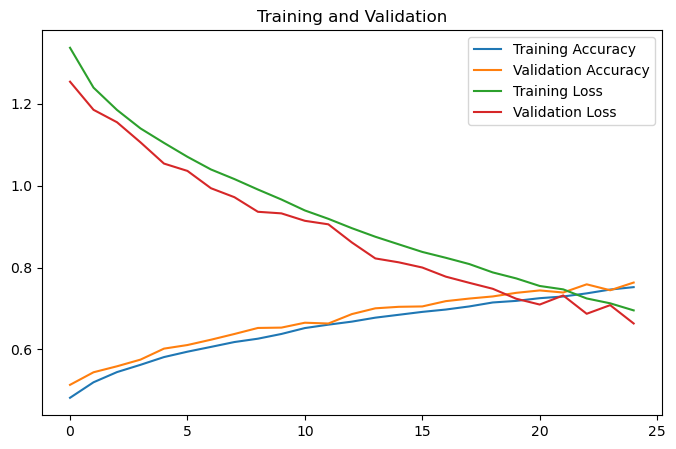

In [80]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(bbox_to_anchor =(1.00,1.00), ncol = 1)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor =(1.00,1.00), ncol = 1)
plt.title('Training and Validation')
plt.show()

Saving the Models


In [81]:
model.save("trial.h5")

In [82]:
load_model = tf.keras.models.load_model('trial.h5')

In [83]:
load_model

Making a prediction

In [86]:
# Make a Prediction Using Test Folder
directory='facial\Testing\Testing\\'

sub_folder = []

#get list of subfolders
for folder in os.listdir(directory):
    
    folder_path = os.path.join(directory,folder)
    if os.path.isdir(folder_path):
        sub_folder.append(folder)

if sub_folder:
    random_sub = random.choice(sub_folder)
    random_subfolder = os.path.join(directory,random_sub)
    
    #get random images
    images = [] # stores the images from subfolder in an array
    for img in os.listdir(random_subfolder):
        if img.endswith(".jpg") or img.endswith(".png") or img.endswith(".jpeg"):
            images.append(img)
            
    if images:
        random_image = random.choice(images)
        random_path = os.path.join(random_subfolder,random_image)

        
print(random_path)
path= random_path
img = image.load_img(path,target_size=(128,128))

test_image = image.load_img(path,target_size=(128,128))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)
pred = load_model.predict(test_image)

score = tf.nn.softmax(pred[0])
score = score.numpy() 
categories = test_dataset.class_indices

print(categories)

result = np.argmax(score)

# actual
if result == 0:
    actual = 'Angry'
elif result == 1:
    actual = 'Fear'
elif result == 2:
    actual = 'Happy'
elif result == 3:
    actual = 'Neutral'
elif result == 4:
    actual = 'Sad'
elif result == 5:
    actual = 'Surprise'

# prediction 
if result == 0:
    prediction = 'Angry'
elif result == 1:
    prediction = 'Fear'
elif result == 2:
    prediction = 'Happy'
elif result == 3:
    prediction = 'Neutral'
elif result == 4:
    prediction = 'Sad'
elif result == 5:
    prediction = 'Surprise'
    
print('Actual: ', actual)
print('Prediction: ',prediction)

plt.imshow(img)

facial\Testing\Testing\Suprise\Suprise-110.jpg


AttributeError: 'numpy.ndarray' object has no attribute 'load_img'